#### Import all the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\hp\Downloads\DS - Assignment Part 1 data set.xlsx')

#### To check the top 5 records of the data

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


#### To check the shape of the data

In [4]:
df.shape

(414, 9)

In [5]:
# Checking the missing values from the data
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
# statistical measures of the datasets
df.describe(include='all').round(2)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,2013.15,17.71,1083.89,4.09,24.97,121.53,1.99,931.48,37.98
std,0.28,11.39,1262.11,2.95,0.01,0.02,0.82,348.91,13.61
min,2012.67,0.00,23.38,0.00,24.93,121.47,1.00,402.00,7.60
25%,2012.92,9.02,289.32,1.00,24.96,121.53,1.00,548.00,27.70
50%,2013.17,16.10,492.23,4.00,24.97,121.54,2.00,975.00,38.45
75%,2013.42,28.15,1454.28,6.00,24.98,121.54,3.00,1234.75,46.60
max,2013.58,43.80,6488.02,10.00,25.01,121.57,3.00,1500.00,117.50


#### Understanding the correlation between the features in the datasets

#### positive correlation
#### negative correlation

<AxesSubplot:>

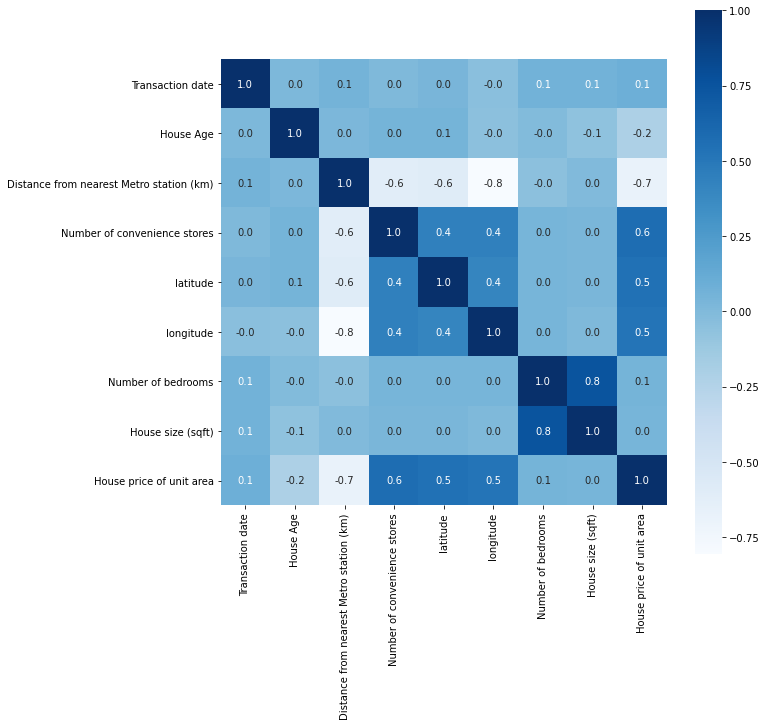

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

#### Checking the outliers present in the data

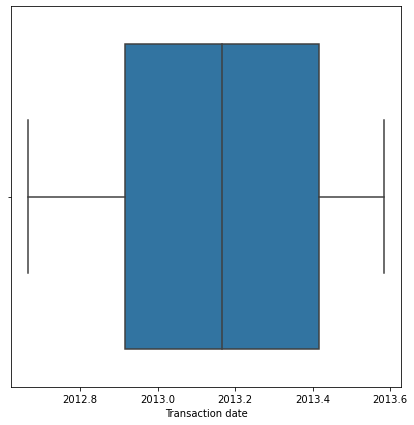

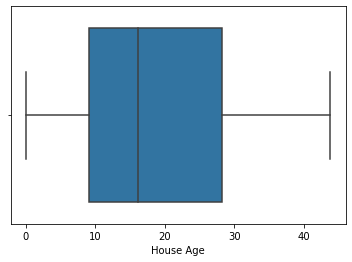

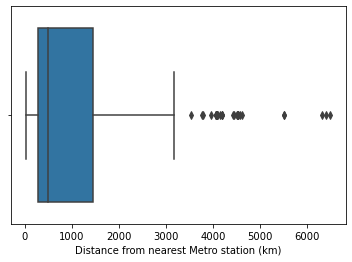

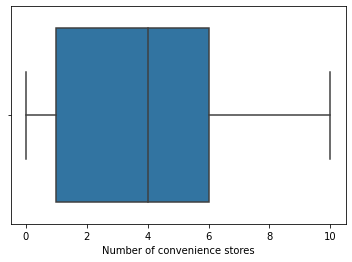

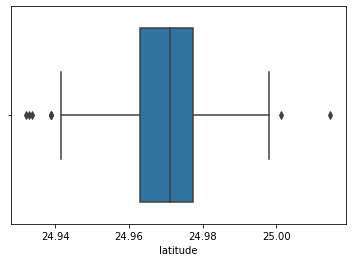

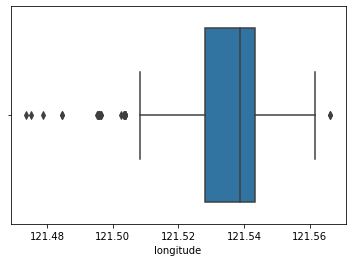

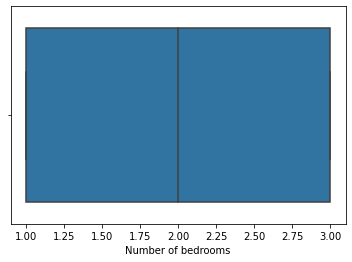

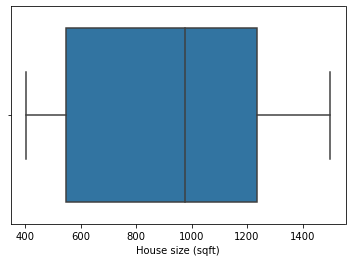

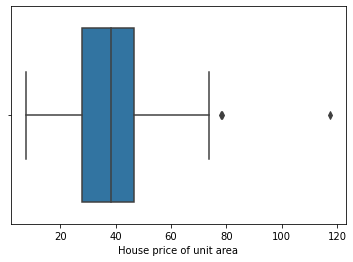

In [8]:
plt.figure(figsize=(7,7))
for i in df:
    sns.boxplot(df[i])
    plt.show()

#### Treating with the outliers by using IQR (INTERQUARTILE RANGE)

In [9]:
IQR = df['Distance from nearest Metro station (km)'].quantile(0.75) - df['Distance from nearest Metro station (km)'].quantile(0.25)

In [10]:
lower_bridge=df['Distance from nearest Metro station (km)'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Distance from nearest Metro station (km)'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1458.1065000000003
3201.7103


(None, None)

In [11]:
df.loc[df['Distance from nearest Metro station (km)']>3201, 'Distance from nearest Metro station (km)'] = 3200

In [12]:
IQR = df['latitude'].quantile(0.75) - df['latitude'].quantile(0.25)

In [13]:
lower_bridge=df['latitude'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['latitude'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

24.941317500000004
24.999137499999996


(None, None)

In [14]:
df.loc[df['latitude']<24.94, 'latitude'] = 24.94
df.loc[df['latitude']>24.99, 'latitude'] = 24.99

In [15]:
IQR = df['longitude'].quantile(0.75) - df['longitude'].quantile(0.25)

In [16]:
lower_bridge=df['longitude'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['longitude'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

121.505255
121.566135


(None, None)

In [17]:
df.loc[df['longitude']<121.51, 'longitude'] = 121.51
df.loc[df['longitude']>121.56, 'longitude'] = 121.56

In [18]:
IQR = df['House price of unit area'].quantile(0.75) - df['House price of unit area'].quantile(0.25)

In [19]:
lower_bridge=df['House price of unit area'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['House price of unit area'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-0.6500000000000021
74.95


(None, None)

In [20]:
df.loc[df['House price of unit area']<27.67, 'House price of unit area'] = 27.67
df.loc[df['House price of unit area']>46.62, 'House price of unit area'] = 46.62

<Figure size 432x288 with 0 Axes>

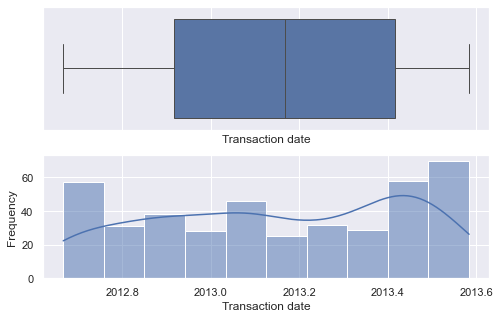

<Figure size 576x360 with 0 Axes>

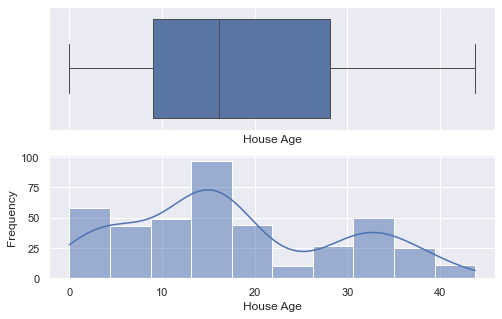

<Figure size 576x360 with 0 Axes>

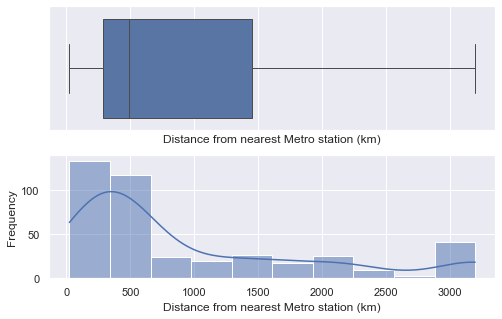

<Figure size 576x360 with 0 Axes>

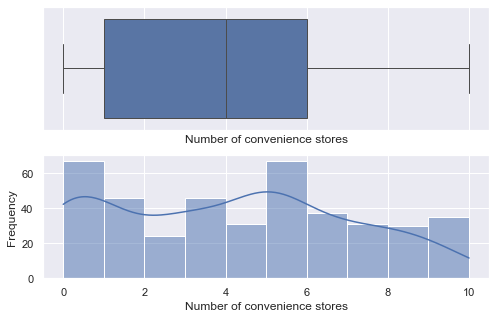

<Figure size 576x360 with 0 Axes>

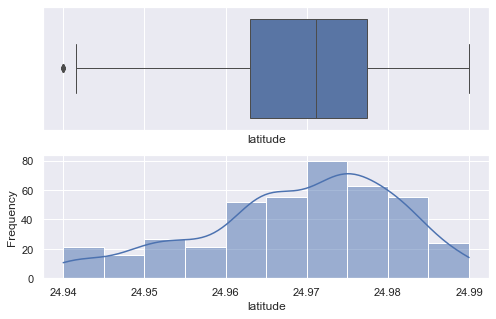

<Figure size 576x360 with 0 Axes>

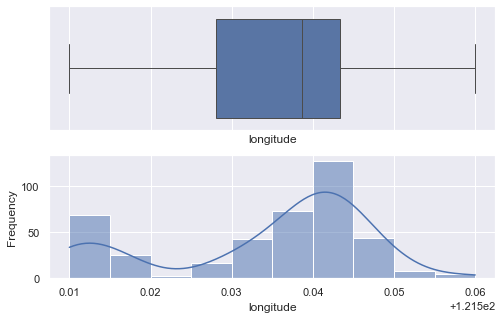

<Figure size 576x360 with 0 Axes>

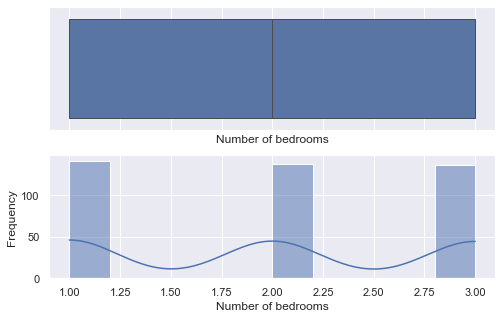

<Figure size 576x360 with 0 Axes>

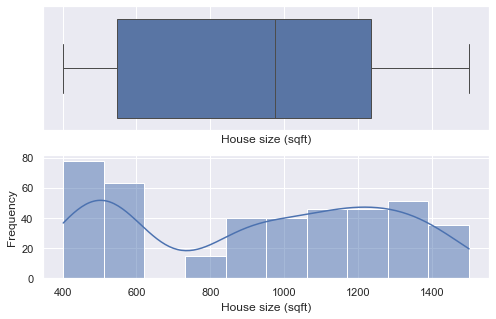

<Figure size 576x360 with 0 Axes>

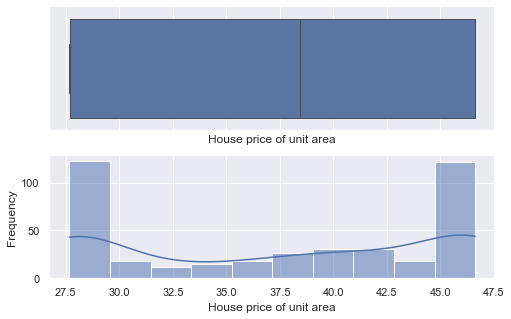

In [21]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

#### Splitting the data into training and testing data

In [22]:
x = df.drop(['House price of unit area'],axis=1)
y = df['House price of unit area']

In [23]:
# Check the p_value 
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ x' , data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     88.02
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           9.21e-84
Time:                        20:39:55   Log-Likelihood:                -1221.6
No. Observations:                 414   AIC:                             2461.
Df Residuals:                     405   BIC:                             2497.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5159.7740   3656.278     -1.411      0.159   -1.23e+04    2027.878
x[0]           1.8734      0.824      2.272      0.024       0.253       3.494
x[1]          -0.1455      0.020     -7.145      0.000      -0.186      -0.105
x[2]          -0.0038      0.000     -8.457      0.000      -0.005      -0.003
x[3]           0.5798      0.103      5.611      0.000       0.377       0.783
x[4]         124.7742     24.772      5.037      0.000      76.077     173.472
x[5]         -13.8746     26.306     -0.527      0.598     -65.588      37.839
x[6]           0.1007      0.428      0.235      0.814      -0.741       0.942
x[7]           0.0003      0.001      0.261      0.794      -0.002       0.002
==============================================================================
Omnibus:                        5.838   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                8.280
Skew:                          -0.006   Prob(JB):                       0.0159
Kurtosis:                       3.693   Cond. No.                     3.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=125)

In [25]:
print(x_train.shape, x_test.shape)

(331, 8) (83, 8)


#### The data is not in standard format. So we need to standarize the data

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Apply the linear Regression model

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'Actual vs Predicted')

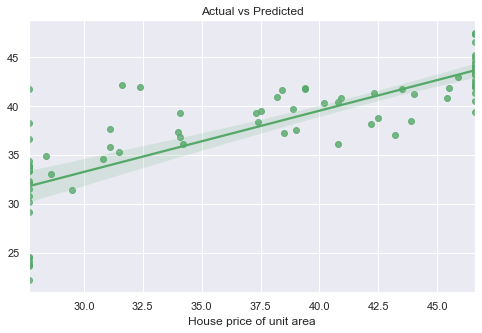

In [28]:
sns.regplot(y_test,model.predict(x_test), color='g')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

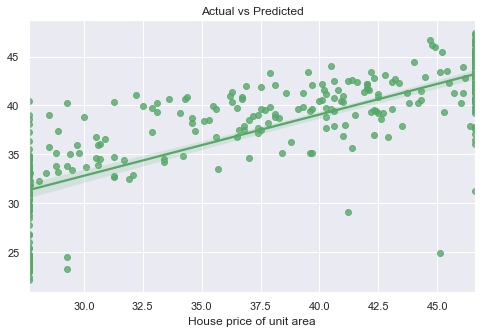

In [29]:
sns.regplot(y_train,model.predict(x_train), color='g')
plt.title('Actual vs Predicted')

In [30]:
mean_absolute_error(y_test,model.predict(x_test))

3.8555159965592667

In [31]:
mean_absolute_error(y_train,model.predict(x_train))

3.7639914896747424

In [32]:
r2_score(y_test,model.predict(x_test))

0.6569854562773862

In [33]:
r2_score(y_train,model.predict(x_train))

0.6273765006495611

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [35]:
r2_score(y_test,knn.predict(x_test))

0.692729430875114

In [36]:
r2_score(y_train,knn.predict(x_train))

0.7818172154535428

Text(0.5, 1.0, 'Actual vs Predicted')

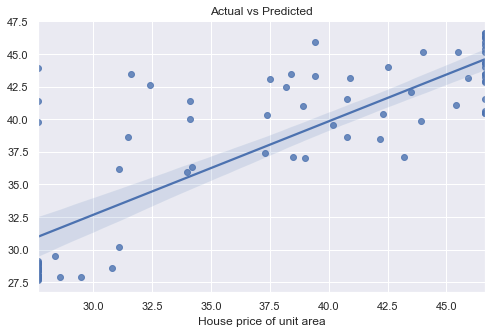

In [37]:
sns.regplot(y_test,knn.predict(x_test))
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

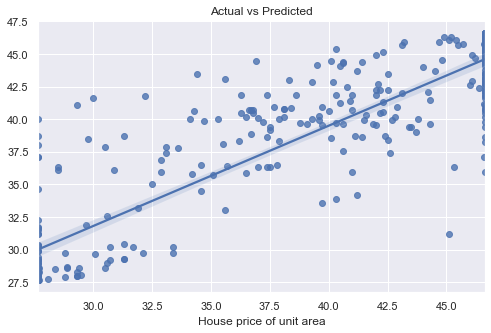

In [38]:
sns.regplot(y_train,knn.predict(x_train))
plt.title('Actual vs Predicted')

In [39]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

#### L1 Technique

In [40]:
las = Lasso()
las.fit(x_train,y_train)

Lasso()

In [41]:
r2_score(y_test,las.predict(x_test))

0.6007523634552452

In [42]:
r2_score(y_train,las.predict(x_train))

0.5755642297211102

Text(0.5, 1.0, 'Actual vs Predicted')

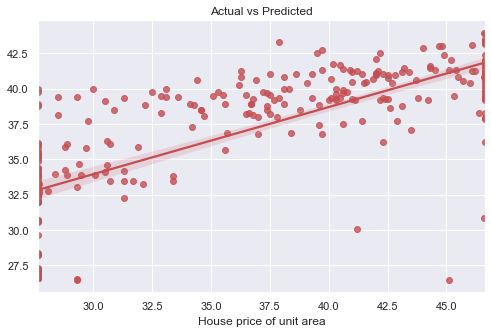

In [43]:
sns.regplot(y_train,las.predict(x_train), color='r')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

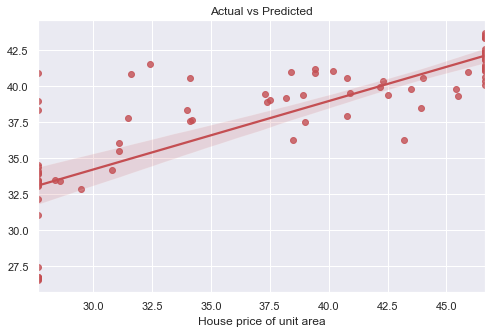

In [44]:
sns.regplot(y_test,las.predict(x_test), color='r')
plt.title('Actual vs Predicted')

#### L2 Technique

In [45]:
rid = Ridge()
rid.fit(x_train,y_train)

Ridge()

In [46]:
r2_score(y_test,rid.predict(x_test))

0.6567152398082383

In [47]:
r2_score(y_train,rid.predict(x_train))

0.62737153145298

Text(0.5, 1.0, 'Actual vs Predicted')

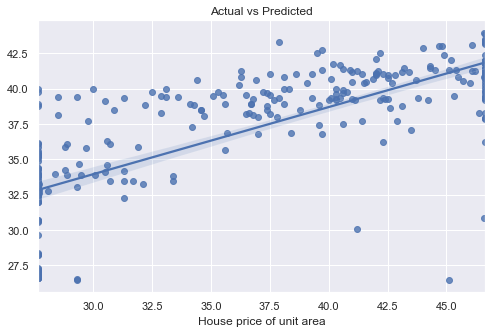

In [48]:
sns.regplot(y_train,las.predict(x_train))
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

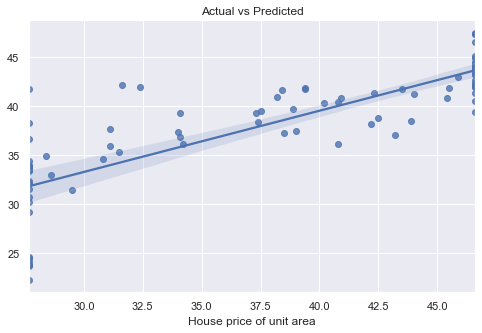

In [49]:
sns.regplot(y_test,rid.predict(x_test))
plt.title('Actual vs Predicted')

#### L1 + L2 Technique

In [50]:
ela = ElasticNet()
ela.fit(x_train,y_train)

ElasticNet()

In [51]:
r2_score(y_test,ela.predict(x_test))

0.5806086760050507

In [52]:
r2_score(y_train,ela.predict(x_train))

0.5633443018161233

##### Boosting technique

In [53]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [54]:
r2_score(y_test,xgb.predict(x_test))

0.7691183074731262

In [55]:
r2_score(y_train,xgb.predict(x_train))

0.9999943083908905

Text(0.5, 1.0, 'Actual vs Predicted')

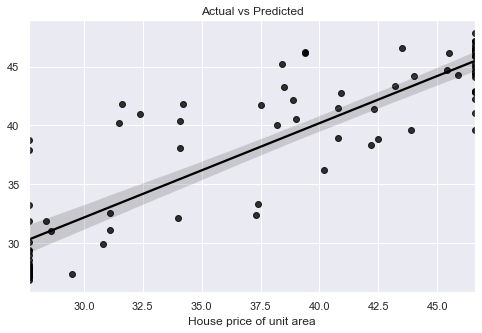

In [56]:
sns.regplot(y_test,xgb.predict(x_test), color='black')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

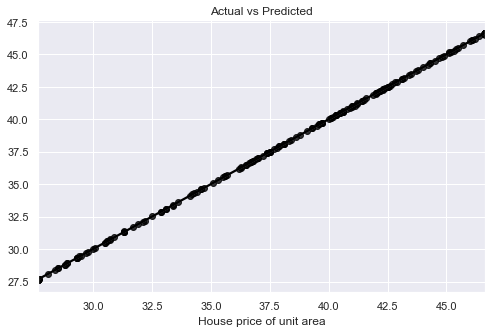

In [57]:
sns.regplot(y_train,xgb.predict(x_train), color='black')
plt.title('Actual vs Predicted')

### Conclusion : we have applied all the regression algorithms, One of the algos (Linear Regression) is performing well rest of them facing overfitting. So, Overall Linear regression gave the good accuracy..........